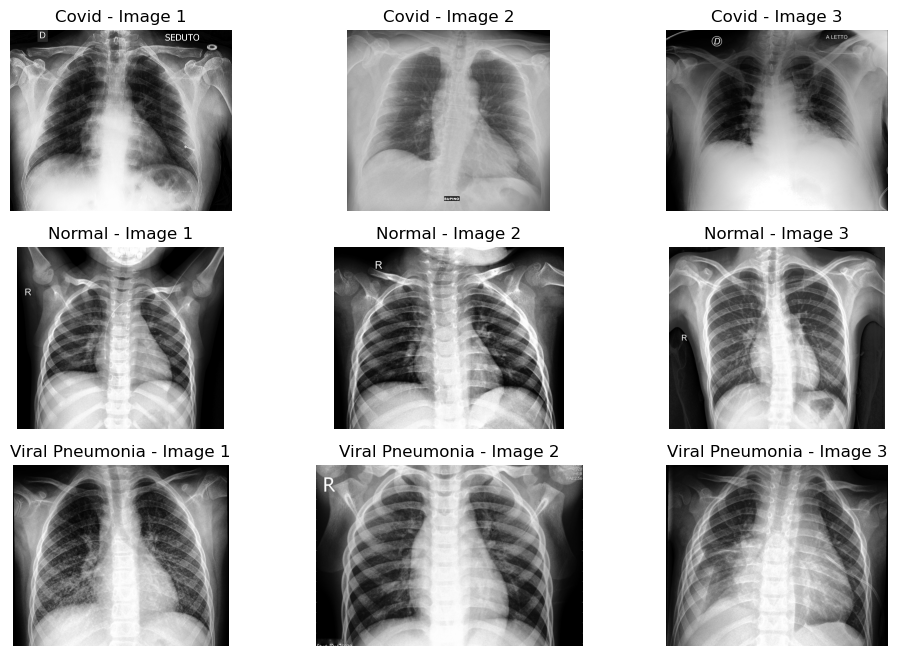

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Define the folder paths
folders = ["Covid", "Normal", "Viral Pneumonia"]

# Create subplots for each folder
fig, axes = plt.subplots(len(folders), 3, figsize=(12, 8))

for i, folder in enumerate(folders):
    image_files = os.listdir(folder)
    
    # Read and display the first 3 images in each folder
    for j, image_file in enumerate(image_files[:3]):
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        axes[i, j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f"{folder} - Image {j+1}")
        axes[i, j].axis("off")

plt.show()


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32
epochs = 50

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Generators
train_data_gen = datagen.flow_from_directory(
    'train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training split
)

validation_data_gen = datagen.flow_from_directory(
    'test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Validation split
)

# Build a CNN Model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Three classes
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // batch_size,
    epochs=epochs
)

# Evaluate the Model
test_loss, test_acc = model.evaluate(validation_data_gen, verbose=2)
print(f'Test accuracy: {test_acc}')


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/50
7/7 [==============================] - 19s 2s/step - loss: 1.9756 - accuracy: 0.2857 - val_loss: 1.0836 - val_accuracy: 0.5469
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 1.0658 - accuracy: 0.4886 - val_loss: 0.9953 - val_accuracy: 0.6250
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 0.9234 - accuracy: 0.5936 - val_loss: 0.8417 - val_accuracy: 0.5156
Epoch 4/50
7/7 [==============================] - 15s 2s/step - loss: 0.6947 - accuracy: 0.6895 - val_loss: 0.7989 - val_accuracy: 0.5781
Epoch 5/50
7/7 [==============================] - 15s 2s/step - loss: 0.6236 - accuracy: 0.7489 - val_loss: 0.7787 - val_accuracy: 0.6562
Epoch 6/50
7/7 [==============================] - 16s 2s/step - loss: 0.5328 - accuracy: 0.7671 - val_loss: 0.6857 - val_accuracy: 0.7344
Epoch 7/50
7/7 [==============================] - 16s 2s/step - loss: 0.5933 - accuracy: 0.

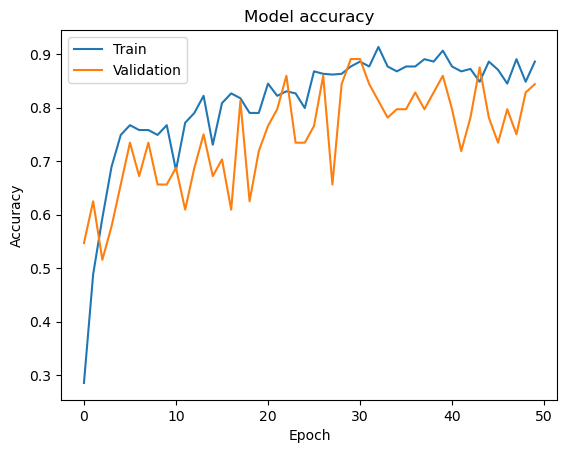

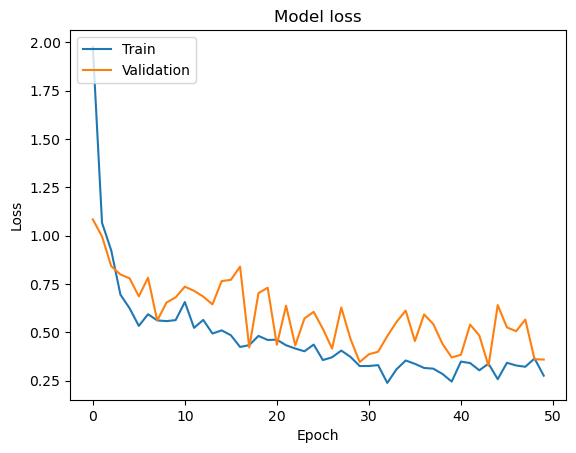

In [4]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


3/3 [==============================] - 2s 515ms/step


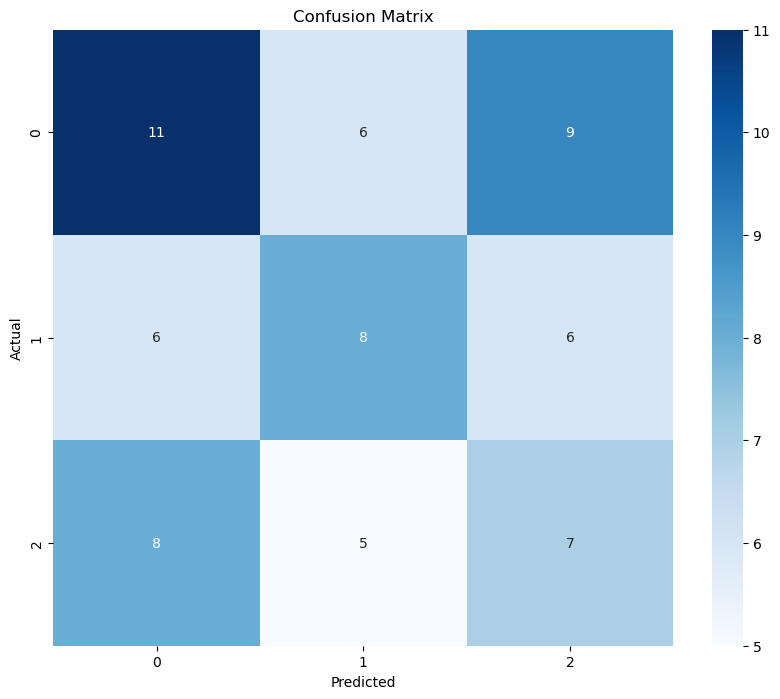

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true labels for the test set
true_labels = validation_data_gen.classes

# Get the predicted labels using the model
predicted_labels = model.predict(validation_data_gen).argmax(axis=1)

# Create a confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 130ms/step


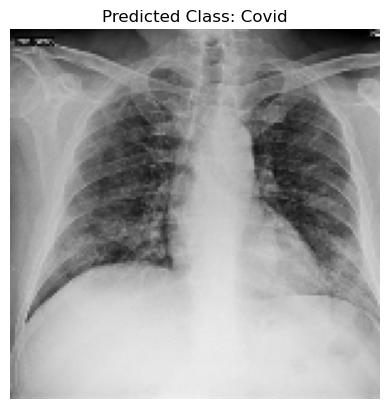

In [22]:
# Define the class labels (update this based on your dataset)
class_labels = ["Covid", "Normal", "Viral Pneumonia"]

# Directory containing the test images
test_dir = "test1"

# Load a random image from the test dataset
image_files = os.listdir(test_dir)
random_image_file = random.choice(image_files)
image_path = os.path.join(test_dir, random_image_file)

# Load and preprocess the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to the model's input size (150x150)
image = cv2.resize(image, (150, 150))

# Rescale the pixel values to the range [0, 1]
image = image / 255.0

# Expand dimensions to match the model's input shape
image = np.expand_dims(image, axis=0)

# Make a prediction using the model
predicted_probabilities = model.predict(image)
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_labels[predicted_class_index]

# Plot the image and display the predicted class
plt.imshow(image[0])
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()
